<a href="https://colab.research.google.com/github/SarahFSBorges/data.science/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

*Decision Tree*, ou Árvore de Decisão em português, é um algoritmo de aprendizado supervisionado para *Machine Learning*, e pode ser usado tanto para classificação quanto para regressão.

Uma *Decision Tree* é construída a partir de um processo de indução, que vai dividindo os dados em subconjuntos cada vez mais puros. Para selecionar os atributos que irão compor a árvore, são considerados o grau de entropia de um nó e a informação ganha a mais após um *split*.

Para mais informações sobre Machine Learning: http://www.r2d3.us/uma-introducao-visual-ao-aprendizado-de-maquina-1/

## Decision Tree no `scikit-learn`

O conjunto de dados que usaremos neste *notebook* foi adapatado do *dataset* original da ***Cleveland Clinic Foundation*** e pode ser baixado no [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease), **considerando pacientes com ou sem doenças cardiovasculares**. O *link* para a versão já tratada do *dataset* está disponível para download [neste link](http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=1).


In [1]:
# importar pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# importar arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=1")

# ver primeiras entradas
print("Tamanho do df:{}\n".format(df.shape))

df.head(10)

Tamanho do df:(303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [2]:
# 1. escolher e importar modelo
from sklearn.tree import DecisionTreeClassifier

# 2. instalar e escolher hyperparameters
model = DecisionTreeClassifier(max_depth=4, criterion="entropy")

# 3. separar dados entre feature matrix e target vector
X = df.drop('num', axis=1)
y = df['num']

# 3.1 dividir dataset entre treino e teste
X_train,X_test,y_train,y_test = train_test_split(X,y)

# 4. fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. fazer previsões com base nos novos dados
y_pred = model.predict(X_test)

In [3]:
# relatório de classificação
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        38
           1       0.93      0.68      0.79        38

    accuracy                           0.82        76
   macro avg       0.84      0.82      0.81        76
weighted avg       0.84      0.82      0.81        76



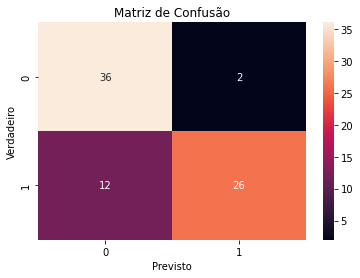

In [4]:
# matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

Caso você queira ver apenas a acurácia, basta executar conforme segue:

In [5]:
# verificar performance do algoritmo
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.8157894736842105


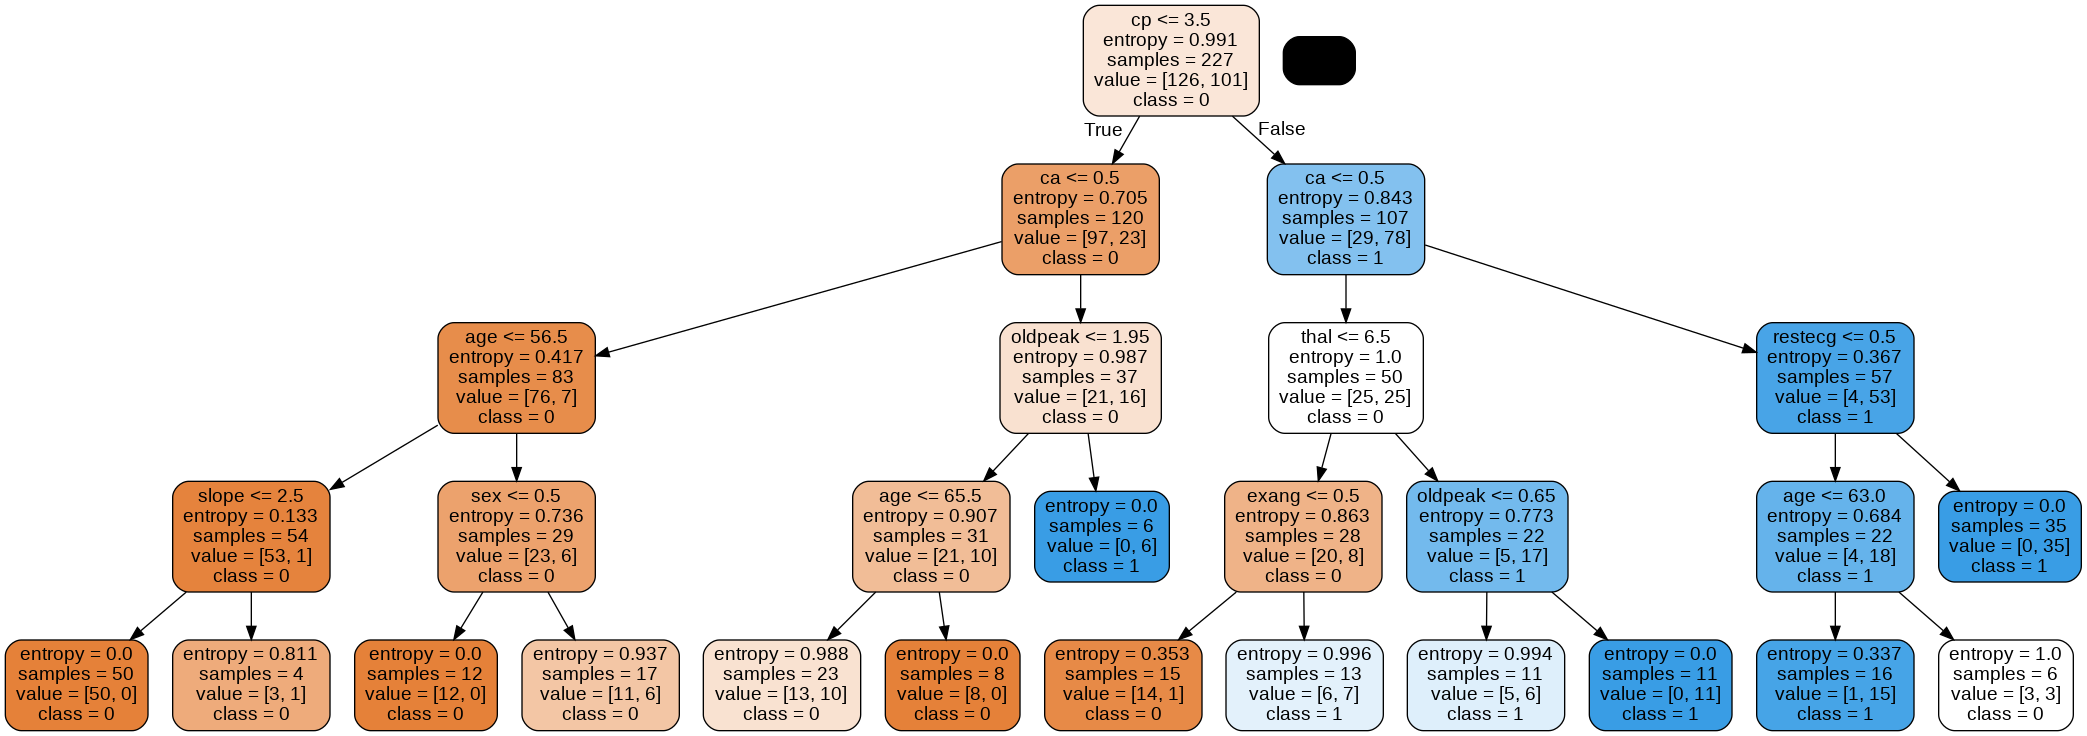

In [6]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# criar DOT
dot = export_graphviz(model, filled=True, rounded = True,
                      feature_names=X.columns, class_names=['0','1'])

# plotar gráfico
graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())